In [7]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot  import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
df=pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [12]:
df.shape

(10000, 6)

In [13]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print("Data shape after removing duplicates:", df.shape)

Data shape after removing duplicates: (9873, 6)


array([[<Axes: xlabel='Hours Studied', ylabel='Hours Studied'>,
        <Axes: xlabel='Previous Scores', ylabel='Hours Studied'>,
        <Axes: xlabel='Sleep Hours', ylabel='Hours Studied'>,
        <Axes: xlabel='Sample Question Papers Practiced', ylabel='Hours Studied'>,
        <Axes: xlabel='Performance Index', ylabel='Hours Studied'>],
       [<Axes: xlabel='Hours Studied', ylabel='Previous Scores'>,
        <Axes: xlabel='Previous Scores', ylabel='Previous Scores'>,
        <Axes: xlabel='Sleep Hours', ylabel='Previous Scores'>,
        <Axes: xlabel='Sample Question Papers Practiced', ylabel='Previous Scores'>,
        <Axes: xlabel='Performance Index', ylabel='Previous Scores'>],
       [<Axes: xlabel='Hours Studied', ylabel='Sleep Hours'>,
        <Axes: xlabel='Previous Scores', ylabel='Sleep Hours'>,
        <Axes: xlabel='Sleep Hours', ylabel='Sleep Hours'>,
        <Axes: xlabel='Sample Question Papers Practiced', ylabel='Sleep Hours'>,
        <Axes: xlabel='Performance 

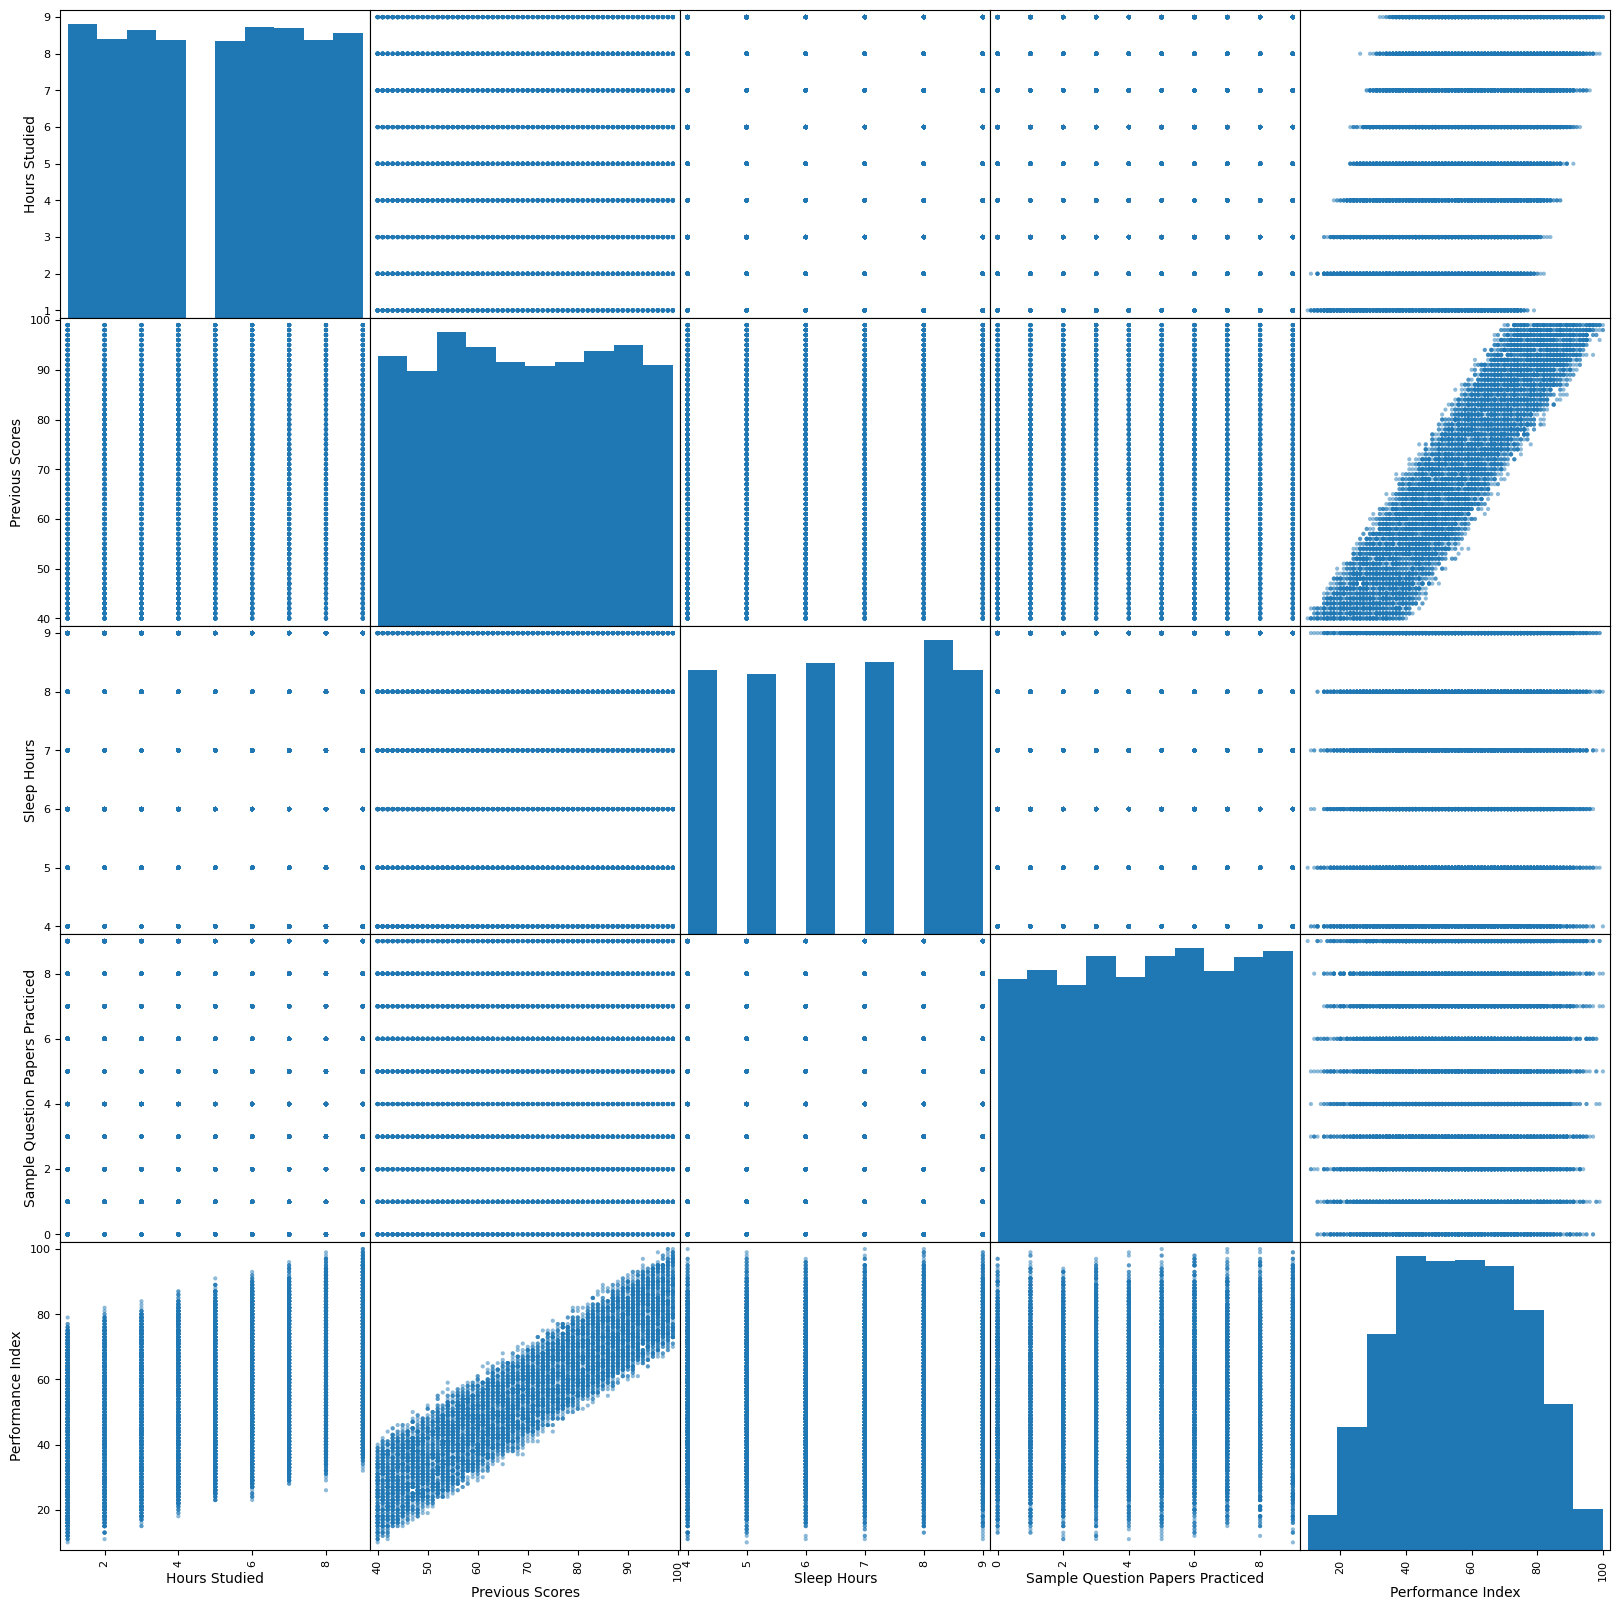

In [14]:
pd.plotting.scatter_matrix(df, figsize=(20,20))

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Performance Index', axis=1)  
y = df['Performance Index']              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7898, 5)
X_test shape: (1975, 5)
y_train shape: (7898,)
y_test shape: (1975,)


In [16]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

lr = LinearRegression()
lr.fit(X_train_encoded, y_train)

LinearRegression()

In [17]:
lr.intercept_

-33.98132449644068

In [18]:
lr.coef_

array([2.8510219 , 1.01843034, 0.47207329, 0.18870366, 0.57382297])

In [19]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [20]:
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
y_pred = lr.predict(X_test_encoded)
y_pred

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

In [21]:
lr.fit(X_train_encoded, y_train)

LinearRegression()

In [22]:
import numpy as np

diff = y_test - y_pred
pd.DataFrame(np.c_[y_test, y_pred, diff], columns=['Actual', 'Predicted', 'Difference'])

,Actual,Predicted,Difference
0,47.0,46.480013,0.519987
1,76.0,80.285379,-4.285379
2,62.0,61.065188,0.934812
3,23.0,22.706315,0.293685
4,76.0,74.836868,1.163132
...,...,...,...
1970,19.0,18.277835,0.722165
1971,39.0,40.310084,-1.310084
1972,77.0,77.084436,-0.084436
1973,88.0,86.246766,1.753234


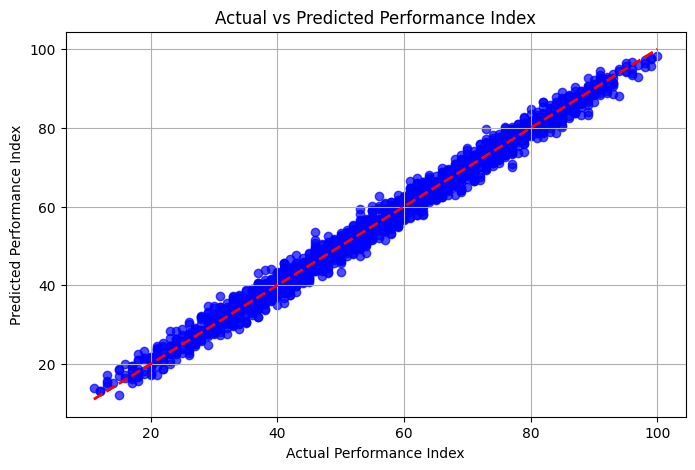

In [23]:
import matplotlib.pyplot as plt

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(8, 5))
plt.scatter(comparison['Actual'], comparison['Predicted'], alpha=0.7, color='blue')
plt.plot([comparison['Actual'].min(), comparison['Actual'].max()],
         [comparison['Actual'].min(), comparison['Actual'].max()],
         'r--', linewidth=2)  # reference line y = x
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("🔍 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


🔍 Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.65
Mean Squared Error (MSE): 4.31
Root Mean Squared Error (RMSE): 2.08
R² Score: 0.99


In [25]:
saad = np.array([[7, 98, 1, 7, 4]])
predicted_saad = lr.predict(saad)
print(f"Predicted Performance Index for Saad: {predicted_saad[0]:.2f}")


Predicted Performance Index for Saad: 89.87


c:\Users\hajis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
hours_studied = float(input("Enter Hours Studied: "))
previous_score = float(input("Enter Previous Score (out of 100): "))
extra_activity = input("Participated in Extracurricular Activities? (Yes/No): ")
sleep_hours = float(input("Enter Sleep Hours: "))
sample_papers = int(input("Enter Number of Sample Question Papers Practiced: "))


extra_activity_numeric = 1 if extra_activity.strip().lower() == 'yes' else 0

saad2 = np.array([[hours_studied, previous_score, extra_activity_numeric, sleep_hours, sample_papers]])

predicted_score = lr.predict(saad2)

print(f"\n Predicted Performance Index: {predicted_score[0]:.2f}")



 Predicted Performance Index: 95.48


c:\Users\hajis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import pickle

with open('student_model.pkl', 'wb') as file:
    pickle.dump(lr, file)